## Advisory 
### If you have not yet begun the project 
Please do not use this workspace.  Use the AWS resources provided and the instructions from the [cloud computing lesson](https://classroom.udacity.com/nanodegrees/nd101/parts/b9c4c3c3-b524-427b-8832-9d0748f14a2e/modules/de12f7bf-d980-4998-ab91-0e411184c878/lessons/29df00d8-01c2-4995-92fa-a4afd020be90/concepts/80d2ed46-1bba-413e-891e-610259017251).
### If you have started on this workspace
Please consider downloading your Jupyter notebook and then following the instructions above on using AWS instead.  You can upload your current work to AWS through your GitHub account.  


As a reminder, the project can be found on the [deep learning GitHub page](https://github.com/udacity/deep-learning/tree/master/face_generation).
These warnings are given because the project frequently generates more data than the workspace can handle, causing loading problems and lost work.  Please use [the forums](https://discussions.udacity.com/c/nd101-part-5-GANs/nd101-generate-faces) if you have any questions on the project or its setup.


# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

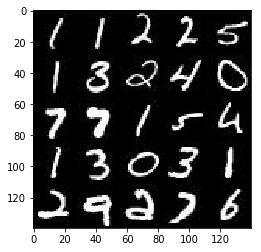

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

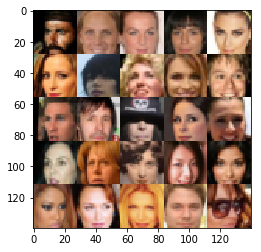

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), name='z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        conv1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        h2 = tf.maximum(alpha * conv2, conv2)
        
        conv3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        h3 = tf.maximum(alpha * conv3, conv3)
        
        reshaped_h = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(reshaped_h, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being ufirst_hd first_hr training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        first_h = tf.layers.dense(z, 2*2*512)
        first_h = tf.reshape(first_h, (-1, 2, 2, 512))
        first_h = tf.layers.batch_normalization(first_h, training=is_train)
        first_h = tf.maximum(alpha * first_h, first_h)
    
        sec_h = tf.layers.conv2d_transpose(first_h, 256, 5, 2, 'valid')
        sec_h = tf.layers.batch_normalization(sec_h, training=is_train)
        sec_h = tf.maximum(alpha * sec_h, sec_h)
    
        third_h = tf.layers.conv2d_transpose(sec_h, 128, 5, 2, 'same')
        third_h = tf.layers.batch_normalization(third_h, training=is_train)
        third_h = tf.maximum(alpha * third_h, third_h)
    
        logits = tf.layers.conv2d_transpose(third_h, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    generated_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(generated_model, reuse=True)
      
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_vars = tf.trainable_variables()
    discrim_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=discrim_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=gen_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    samples, img_width, img_height, img_channels = data_shape
    real_input, z_input, lr = model_inputs(img_width, img_height, img_channels, z_dim)    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    cnt = 0
    print_every = 10
    show = 100
    losses = []
    n_images = 25
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                cnt += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                if cnt % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                    
                if cnt % show == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Discriminator Loss: 0.2424... Generator Loss: 12.8155
Epoch 1/2... Discriminator Loss: 0.0739... Generator Loss: 17.8979
Epoch 1/2... Discriminator Loss: 0.0667... Generator Loss: 4.3508
Epoch 1/2... Discriminator Loss: 0.9895... Generator Loss: 0.5111
Epoch 1/2... Discriminator Loss: 0.1863... Generator Loss: 12.6076
Epoch 1/2... Discriminator Loss: 2.4503... Generator Loss: 0.9001
Epoch 1/2... Discriminator Loss: 1.1550... Generator Loss: 1.4059
Epoch 1/2... Discriminator Loss: 0.7285... Generator Loss: 2.5923
Epoch 1/2... Discriminator Loss: 0.6967... Generator Loss: 1.0756
Epoch 1/2... Discriminator Loss: 0.4549... Generator Loss: 1.5220


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.5162... Generator Loss: 2.5158
Epoch 1/2... Discriminator Loss: 0.4893... Generator Loss: 1.4177
Epoch 1/2... Discriminator Loss: 0.2295... Generator Loss: 2.7924
Epoch 1/2... Discriminator Loss: 0.2491... Generator Loss: 4.1348
Epoch 1/2... Discriminator Loss: 0.1755... Generator Loss: 3.8607
Epoch 1/2... Discriminator Loss: 0.2614... Generator Loss: 2.8434
Epoch 1/2... Discriminator Loss: 0.4092... Generator Loss: 4.6718
Epoch 1/2... Discriminator Loss: 1.1877... Generator Loss: 0.5976
Epoch 1/2... Discriminator Loss: 0.3881... Generator Loss: 1.9851
Epoch 1/2... Discriminator Loss: 0.2357... Generator Loss: 2.2236


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.2438... Generator Loss: 2.4373
Epoch 1/2... Discriminator Loss: 0.1974... Generator Loss: 2.4541
Epoch 1/2... Discriminator Loss: 0.1763... Generator Loss: 3.0083
Epoch 1/2... Discriminator Loss: 0.1663... Generator Loss: 3.9364
Epoch 1/2... Discriminator Loss: 0.3392... Generator Loss: 1.7414
Epoch 1/2... Discriminator Loss: 0.2142... Generator Loss: 2.8778
Epoch 1/2... Discriminator Loss: 0.4697... Generator Loss: 2.2117
Epoch 1/2... Discriminator Loss: 0.7533... Generator Loss: 5.4301
Epoch 1/2... Discriminator Loss: 0.3218... Generator Loss: 1.8505
Epoch 1/2... Discriminator Loss: 0.7375... Generator Loss: 1.1077


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.6005... Generator Loss: 2.1395
Epoch 1/2... Discriminator Loss: 0.4920... Generator Loss: 1.5350
Epoch 1/2... Discriminator Loss: 0.8724... Generator Loss: 1.4834
Epoch 1/2... Discriminator Loss: 0.5180... Generator Loss: 2.5161
Epoch 1/2... Discriminator Loss: 0.6477... Generator Loss: 1.0611
Epoch 1/2... Discriminator Loss: 0.3527... Generator Loss: 2.5205
Epoch 1/2... Discriminator Loss: 0.9174... Generator Loss: 0.9075
Epoch 1/2... Discriminator Loss: 0.6884... Generator Loss: 3.8494
Epoch 1/2... Discriminator Loss: 0.6686... Generator Loss: 2.7750
Epoch 1/2... Discriminator Loss: 0.7261... Generator Loss: 3.1064


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 1.0742... Generator Loss: 0.7826
Epoch 1/2... Discriminator Loss: 0.6532... Generator Loss: 1.6014
Epoch 1/2... Discriminator Loss: 1.0629... Generator Loss: 0.7966
Epoch 1/2... Discriminator Loss: 0.5510... Generator Loss: 1.7221
Epoch 1/2... Discriminator Loss: 0.5904... Generator Loss: 1.4335
Epoch 1/2... Discriminator Loss: 0.8401... Generator Loss: 3.4487
Epoch 1/2... Discriminator Loss: 0.7185... Generator Loss: 1.5508
Epoch 1/2... Discriminator Loss: 0.4351... Generator Loss: 2.0486
Epoch 1/2... Discriminator Loss: 0.6946... Generator Loss: 2.1268
Epoch 1/2... Discriminator Loss: 1.2133... Generator Loss: 0.8742


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.6500... Generator Loss: 1.7090
Epoch 1/2... Discriminator Loss: 0.3639... Generator Loss: 1.9575
Epoch 1/2... Discriminator Loss: 0.6151... Generator Loss: 1.5523
Epoch 1/2... Discriminator Loss: 0.6044... Generator Loss: 1.3722
Epoch 1/2... Discriminator Loss: 0.9857... Generator Loss: 0.7933
Epoch 1/2... Discriminator Loss: 0.9651... Generator Loss: 1.7545
Epoch 1/2... Discriminator Loss: 1.0878... Generator Loss: 0.5931
Epoch 1/2... Discriminator Loss: 0.5499... Generator Loss: 1.8726
Epoch 1/2... Discriminator Loss: 0.6055... Generator Loss: 1.2378
Epoch 1/2... Discriminator Loss: 0.6816... Generator Loss: 2.0123


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.7440... Generator Loss: 2.7347
Epoch 1/2... Discriminator Loss: 0.8901... Generator Loss: 0.8023
Epoch 1/2... Discriminator Loss: 0.6692... Generator Loss: 1.3320
Epoch 1/2... Discriminator Loss: 0.6797... Generator Loss: 1.3437
Epoch 1/2... Discriminator Loss: 0.6988... Generator Loss: 1.4626
Epoch 1/2... Discriminator Loss: 0.7846... Generator Loss: 1.5526
Epoch 1/2... Discriminator Loss: 0.9770... Generator Loss: 2.3813
Epoch 1/2... Discriminator Loss: 0.8558... Generator Loss: 0.9891
Epoch 1/2... Discriminator Loss: 0.6928... Generator Loss: 1.1528
Epoch 1/2... Discriminator Loss: 0.6845... Generator Loss: 1.3280


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.7464... Generator Loss: 1.1294
Epoch 1/2... Discriminator Loss: 0.6693... Generator Loss: 1.1408
Epoch 1/2... Discriminator Loss: 0.8160... Generator Loss: 1.0518
Epoch 1/2... Discriminator Loss: 0.6426... Generator Loss: 1.7720
Epoch 1/2... Discriminator Loss: 1.4065... Generator Loss: 0.4420
Epoch 1/2... Discriminator Loss: 0.8558... Generator Loss: 1.4567
Epoch 1/2... Discriminator Loss: 0.7721... Generator Loss: 2.3488
Epoch 1/2... Discriminator Loss: 0.6978... Generator Loss: 1.1658
Epoch 1/2... Discriminator Loss: 0.6564... Generator Loss: 2.1505
Epoch 1/2... Discriminator Loss: 0.7233... Generator Loss: 1.1466


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.6576... Generator Loss: 1.9478
Epoch 1/2... Discriminator Loss: 1.0732... Generator Loss: 0.6402
Epoch 1/2... Discriminator Loss: 0.8503... Generator Loss: 0.9170
Epoch 1/2... Discriminator Loss: 0.9186... Generator Loss: 2.5744
Epoch 1/2... Discriminator Loss: 1.4132... Generator Loss: 3.3212
Epoch 1/2... Discriminator Loss: 1.0778... Generator Loss: 0.7543
Epoch 1/2... Discriminator Loss: 0.8568... Generator Loss: 2.3813
Epoch 1/2... Discriminator Loss: 0.8471... Generator Loss: 1.6942
Epoch 1/2... Discriminator Loss: 0.6324... Generator Loss: 1.3163
Epoch 1/2... Discriminator Loss: 0.8381... Generator Loss: 2.2124


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.7025... Generator Loss: 2.0501
Epoch 1/2... Discriminator Loss: 0.7133... Generator Loss: 1.9894
Epoch 1/2... Discriminator Loss: 0.7245... Generator Loss: 1.1127
Epoch 2/2... Discriminator Loss: 0.6582... Generator Loss: 1.6389
Epoch 2/2... Discriminator Loss: 1.1969... Generator Loss: 0.5296
Epoch 2/2... Discriminator Loss: 0.8394... Generator Loss: 1.6188
Epoch 2/2... Discriminator Loss: 0.6174... Generator Loss: 2.0375
Epoch 2/2... Discriminator Loss: 0.8997... Generator Loss: 2.4457
Epoch 2/2... Discriminator Loss: 0.9918... Generator Loss: 0.7901
Epoch 2/2... Discriminator Loss: 0.8806... Generator Loss: 0.8553


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.7873... Generator Loss: 0.9404
Epoch 2/2... Discriminator Loss: 0.9893... Generator Loss: 2.0407
Epoch 2/2... Discriminator Loss: 0.7131... Generator Loss: 1.2448
Epoch 2/2... Discriminator Loss: 0.8212... Generator Loss: 0.9708
Epoch 2/2... Discriminator Loss: 1.0241... Generator Loss: 2.6943
Epoch 2/2... Discriminator Loss: 0.8289... Generator Loss: 1.7423
Epoch 2/2... Discriminator Loss: 0.6811... Generator Loss: 1.9793
Epoch 2/2... Discriminator Loss: 0.7428... Generator Loss: 1.2720
Epoch 2/2... Discriminator Loss: 0.7536... Generator Loss: 1.6871
Epoch 2/2... Discriminator Loss: 0.7221... Generator Loss: 1.7745


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.6243... Generator Loss: 1.1470
Epoch 2/2... Discriminator Loss: 0.9677... Generator Loss: 0.7487
Epoch 2/2... Discriminator Loss: 0.7188... Generator Loss: 1.7876
Epoch 2/2... Discriminator Loss: 1.1524... Generator Loss: 0.5637
Epoch 2/2... Discriminator Loss: 0.8368... Generator Loss: 1.6229
Epoch 2/2... Discriminator Loss: 0.9691... Generator Loss: 1.4698
Epoch 2/2... Discriminator Loss: 0.8978... Generator Loss: 0.7540
Epoch 2/2... Discriminator Loss: 0.7276... Generator Loss: 1.1589
Epoch 2/2... Discriminator Loss: 0.7321... Generator Loss: 1.8985
Epoch 2/2... Discriminator Loss: 1.1285... Generator Loss: 0.5747


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.7707... Generator Loss: 0.9782
Epoch 2/2... Discriminator Loss: 0.9349... Generator Loss: 0.7165
Epoch 2/2... Discriminator Loss: 0.9216... Generator Loss: 1.4935
Epoch 2/2... Discriminator Loss: 0.8319... Generator Loss: 0.8906
Epoch 2/2... Discriminator Loss: 0.8399... Generator Loss: 0.9188
Epoch 2/2... Discriminator Loss: 1.2463... Generator Loss: 0.4760
Epoch 2/2... Discriminator Loss: 0.7734... Generator Loss: 1.0952
Epoch 2/2... Discriminator Loss: 1.2898... Generator Loss: 0.4677
Epoch 2/2... Discriminator Loss: 0.7465... Generator Loss: 1.0383
Epoch 2/2... Discriminator Loss: 0.7508... Generator Loss: 0.8753


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.9014... Generator Loss: 1.8529
Epoch 2/2... Discriminator Loss: 0.6853... Generator Loss: 1.1915
Epoch 2/2... Discriminator Loss: 1.0699... Generator Loss: 0.5556
Epoch 2/2... Discriminator Loss: 0.7556... Generator Loss: 1.2879
Epoch 2/2... Discriminator Loss: 0.7900... Generator Loss: 1.2515
Epoch 2/2... Discriminator Loss: 0.6960... Generator Loss: 1.0228
Epoch 2/2... Discriminator Loss: 0.7388... Generator Loss: 1.2213
Epoch 2/2... Discriminator Loss: 3.2513... Generator Loss: 4.3948
Epoch 2/2... Discriminator Loss: 0.8664... Generator Loss: 1.0730
Epoch 2/2... Discriminator Loss: 0.7418... Generator Loss: 1.1814


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.7729... Generator Loss: 0.9794
Epoch 2/2... Discriminator Loss: 1.5894... Generator Loss: 0.3509
Epoch 2/2... Discriminator Loss: 0.6641... Generator Loss: 1.2872
Epoch 2/2... Discriminator Loss: 0.5549... Generator Loss: 1.5051
Epoch 2/2... Discriminator Loss: 0.7036... Generator Loss: 1.4378
Epoch 2/2... Discriminator Loss: 1.3253... Generator Loss: 0.6483
Epoch 2/2... Discriminator Loss: 1.0589... Generator Loss: 0.7211
Epoch 2/2... Discriminator Loss: 1.0112... Generator Loss: 0.8873
Epoch 2/2... Discriminator Loss: 0.7811... Generator Loss: 0.9214
Epoch 2/2... Discriminator Loss: 0.7499... Generator Loss: 0.9897


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.6793... Generator Loss: 1.4818
Epoch 2/2... Discriminator Loss: 1.1068... Generator Loss: 0.5442
Epoch 2/2... Discriminator Loss: 0.9595... Generator Loss: 0.7866
Epoch 2/2... Discriminator Loss: 0.9265... Generator Loss: 1.4215
Epoch 2/2... Discriminator Loss: 1.0137... Generator Loss: 3.4540
Epoch 2/2... Discriminator Loss: 0.6730... Generator Loss: 1.2984
Epoch 2/2... Discriminator Loss: 1.1794... Generator Loss: 0.5714
Epoch 2/2... Discriminator Loss: 1.0194... Generator Loss: 0.6272
Epoch 2/2... Discriminator Loss: 1.2427... Generator Loss: 0.6413
Epoch 2/2... Discriminator Loss: 0.8175... Generator Loss: 0.8227


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 1.1438... Generator Loss: 0.6297
Epoch 2/2... Discriminator Loss: 0.6458... Generator Loss: 1.3533
Epoch 2/2... Discriminator Loss: 1.0377... Generator Loss: 0.6768
Epoch 2/2... Discriminator Loss: 0.8806... Generator Loss: 1.0443
Epoch 2/2... Discriminator Loss: 0.9565... Generator Loss: 1.1787
Epoch 2/2... Discriminator Loss: 1.2054... Generator Loss: 0.4882
Epoch 2/2... Discriminator Loss: 0.9775... Generator Loss: 0.6549
Epoch 2/2... Discriminator Loss: 0.7469... Generator Loss: 0.9403
Epoch 2/2... Discriminator Loss: 1.0954... Generator Loss: 0.6229
Epoch 2/2... Discriminator Loss: 1.2796... Generator Loss: 0.5082


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.8029... Generator Loss: 0.8081
Epoch 2/2... Discriminator Loss: 1.0636... Generator Loss: 0.5977
Epoch 2/2... Discriminator Loss: 0.5137... Generator Loss: 1.9188
Epoch 2/2... Discriminator Loss: 0.7712... Generator Loss: 1.8358
Epoch 2/2... Discriminator Loss: 1.0583... Generator Loss: 2.1544
Epoch 2/2... Discriminator Loss: 1.2511... Generator Loss: 0.4453
Epoch 2/2... Discriminator Loss: 0.7378... Generator Loss: 1.2219
Epoch 2/2... Discriminator Loss: 1.0120... Generator Loss: 0.5965
Epoch 2/2... Discriminator Loss: 0.6062... Generator Loss: 1.9138
Epoch 2/2... Discriminator Loss: 0.6930... Generator Loss: 1.7488


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 1.4198... Generator Loss: 0.3992
Epoch 2/2... Discriminator Loss: 0.5566... Generator Loss: 1.0983
Epoch 2/2... Discriminator Loss: 1.0443... Generator Loss: 0.5760
Epoch 2/2... Discriminator Loss: 2.1520... Generator Loss: 0.1964
Epoch 2/2... Discriminator Loss: 0.9617... Generator Loss: 0.6796
Epoch 2/2... Discriminator Loss: 0.7676... Generator Loss: 0.9004
Epoch 2/2... Discriminator Loss: 1.5462... Generator Loss: 0.4061


### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.2890... Generator Loss: 10.6723
Epoch 1/1... Discriminator Loss: 0.1263... Generator Loss: 9.7199
Epoch 1/1... Discriminator Loss: 0.0293... Generator Loss: 8.5791
Epoch 1/1... Discriminator Loss: 0.0295... Generator Loss: 15.7147
Epoch 1/1... Discriminator Loss: 0.7167... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 0.0498... Generator Loss: 9.7908
Epoch 1/1... Discriminator Loss: 0.9867... Generator Loss: 18.0649
Epoch 1/1... Discriminator Loss: 0.7093... Generator Loss: 5.4237
Epoch 1/1... Discriminator Loss: 0.5220... Generator Loss: 6.2905
Epoch 1/1... Discriminator Loss: 0.4892... Generator Loss: 3.2777


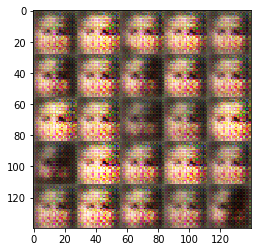

Epoch 1/1... Discriminator Loss: 0.2103... Generator Loss: 2.6532
Epoch 1/1... Discriminator Loss: 0.1655... Generator Loss: 3.4763
Epoch 1/1... Discriminator Loss: 0.2353... Generator Loss: 4.1966
Epoch 1/1... Discriminator Loss: 0.7044... Generator Loss: 5.3212
Epoch 1/1... Discriminator Loss: 0.2679... Generator Loss: 2.5519
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 7.1768
Epoch 1/1... Discriminator Loss: 0.3362... Generator Loss: 2.3645
Epoch 1/1... Discriminator Loss: 0.8871... Generator Loss: 1.4223
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.5244
Epoch 1/1... Discriminator Loss: 1.4637... Generator Loss: 0.5857


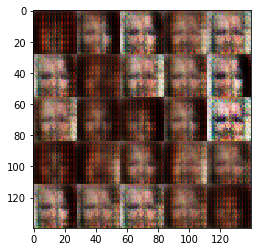

Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 1.8401
Epoch 1/1... Discriminator Loss: 1.2282... Generator Loss: 2.2354
Epoch 1/1... Discriminator Loss: 1.1074... Generator Loss: 1.0176
Epoch 1/1... Discriminator Loss: 0.7944... Generator Loss: 1.2692
Epoch 1/1... Discriminator Loss: 0.9655... Generator Loss: 1.4197
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.5741
Epoch 1/1... Discriminator Loss: 0.8734... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 1.6503... Generator Loss: 0.5920
Epoch 1/1... Discriminator Loss: 1.2687... Generator Loss: 1.0483
Epoch 1/1... Discriminator Loss: 0.4979... Generator Loss: 1.4357


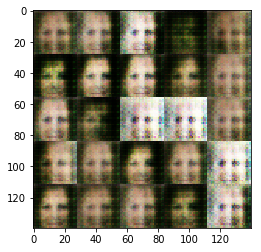

Epoch 1/1... Discriminator Loss: 0.8478... Generator Loss: 0.8567
Epoch 1/1... Discriminator Loss: 0.8927... Generator Loss: 2.4662
Epoch 1/1... Discriminator Loss: 0.6885... Generator Loss: 1.4752
Epoch 1/1... Discriminator Loss: 1.0821... Generator Loss: 0.7464
Epoch 1/1... Discriminator Loss: 1.1144... Generator Loss: 1.9832
Epoch 1/1... Discriminator Loss: 1.2038... Generator Loss: 1.0503
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 1.2433
Epoch 1/1... Discriminator Loss: 0.6513... Generator Loss: 1.2639
Epoch 1/1... Discriminator Loss: 0.7130... Generator Loss: 1.9640
Epoch 1/1... Discriminator Loss: 1.1139... Generator Loss: 1.1630


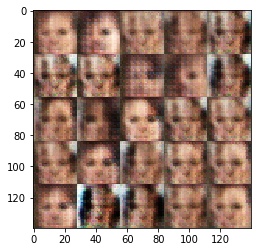

Epoch 1/1... Discriminator Loss: 0.6902... Generator Loss: 1.7786
Epoch 1/1... Discriminator Loss: 1.1497... Generator Loss: 1.4053
Epoch 1/1... Discriminator Loss: 1.0001... Generator Loss: 0.9615
Epoch 1/1... Discriminator Loss: 0.6854... Generator Loss: 1.5584
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 0.8273
Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 1.0876
Epoch 1/1... Discriminator Loss: 0.9278... Generator Loss: 1.0762
Epoch 1/1... Discriminator Loss: 1.0420... Generator Loss: 0.9738
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.5853
Epoch 1/1... Discriminator Loss: 1.6294... Generator Loss: 0.3465


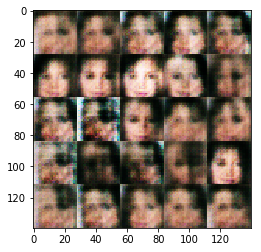

Epoch 1/1... Discriminator Loss: 1.1882... Generator Loss: 1.1866
Epoch 1/1... Discriminator Loss: 0.9504... Generator Loss: 1.1863
Epoch 1/1... Discriminator Loss: 1.0960... Generator Loss: 0.9010
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 0.8825... Generator Loss: 1.1051
Epoch 1/1... Discriminator Loss: 1.6705... Generator Loss: 0.3012
Epoch 1/1... Discriminator Loss: 0.9464... Generator Loss: 1.8264
Epoch 1/1... Discriminator Loss: 1.0626... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 1.3107... Generator Loss: 1.1020
Epoch 1/1... Discriminator Loss: 0.9345... Generator Loss: 1.6035


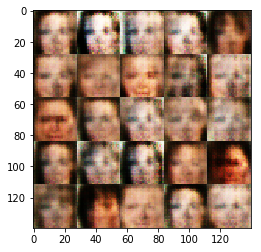

Epoch 1/1... Discriminator Loss: 0.8474... Generator Loss: 1.0983
Epoch 1/1... Discriminator Loss: 0.8726... Generator Loss: 1.1324
Epoch 1/1... Discriminator Loss: 0.5105... Generator Loss: 1.6548
Epoch 1/1... Discriminator Loss: 1.0482... Generator Loss: 1.3114
Epoch 1/1... Discriminator Loss: 0.7092... Generator Loss: 1.5074
Epoch 1/1... Discriminator Loss: 0.8623... Generator Loss: 1.2297
Epoch 1/1... Discriminator Loss: 0.9838... Generator Loss: 1.2281
Epoch 1/1... Discriminator Loss: 0.9523... Generator Loss: 2.1654
Epoch 1/1... Discriminator Loss: 0.7372... Generator Loss: 1.0665
Epoch 1/1... Discriminator Loss: 1.8327... Generator Loss: 0.2597


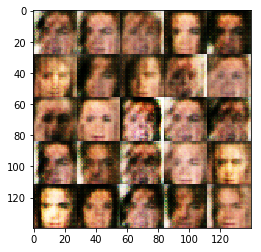

Epoch 1/1... Discriminator Loss: 0.9151... Generator Loss: 1.0335
Epoch 1/1... Discriminator Loss: 0.9032... Generator Loss: 1.3302
Epoch 1/1... Discriminator Loss: 0.8236... Generator Loss: 0.9856
Epoch 1/1... Discriminator Loss: 1.2816... Generator Loss: 1.9922
Epoch 1/1... Discriminator Loss: 0.7768... Generator Loss: 1.3263
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.5863
Epoch 1/1... Discriminator Loss: 1.1327... Generator Loss: 0.7107
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 1.0967... Generator Loss: 1.6811
Epoch 1/1... Discriminator Loss: 1.3407... Generator Loss: 0.6467


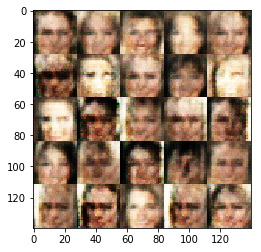

Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 0.9794
Epoch 1/1... Discriminator Loss: 1.1579... Generator Loss: 0.6906
Epoch 1/1... Discriminator Loss: 0.8844... Generator Loss: 1.4767
Epoch 1/1... Discriminator Loss: 1.0637... Generator Loss: 0.8824
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 1.3388
Epoch 1/1... Discriminator Loss: 1.0445... Generator Loss: 1.1282
Epoch 1/1... Discriminator Loss: 1.1050... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 1.0436... Generator Loss: 0.7453
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.5094
Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 0.4684


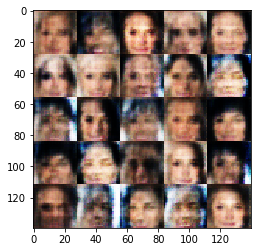

Epoch 1/1... Discriminator Loss: 0.6630... Generator Loss: 1.4686
Epoch 1/1... Discriminator Loss: 0.7366... Generator Loss: 1.2289
Epoch 1/1... Discriminator Loss: 1.1909... Generator Loss: 1.0153
Epoch 1/1... Discriminator Loss: 0.8618... Generator Loss: 1.5955
Epoch 1/1... Discriminator Loss: 0.9878... Generator Loss: 0.9026
Epoch 1/1... Discriminator Loss: 0.8179... Generator Loss: 1.0537
Epoch 1/1... Discriminator Loss: 1.2090... Generator Loss: 1.0030
Epoch 1/1... Discriminator Loss: 0.7724... Generator Loss: 1.0579
Epoch 1/1... Discriminator Loss: 1.0260... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 1.7121


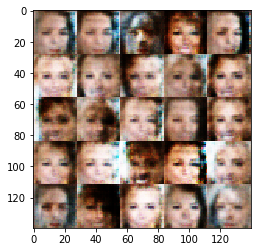

Epoch 1/1... Discriminator Loss: 1.2810... Generator Loss: 0.5242
Epoch 1/1... Discriminator Loss: 0.9110... Generator Loss: 0.9643
Epoch 1/1... Discriminator Loss: 1.1004... Generator Loss: 0.8242
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 1.5165
Epoch 1/1... Discriminator Loss: 0.9328... Generator Loss: 1.1041
Epoch 1/1... Discriminator Loss: 0.9335... Generator Loss: 0.9431
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 1.1038
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 2.3286
Epoch 1/1... Discriminator Loss: 0.7522... Generator Loss: 1.5444
Epoch 1/1... Discriminator Loss: 1.0521... Generator Loss: 1.0691


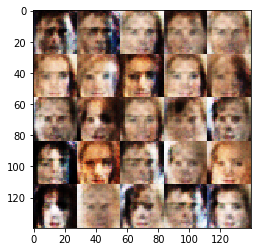

Epoch 1/1... Discriminator Loss: 1.2603... Generator Loss: 0.5794
Epoch 1/1... Discriminator Loss: 0.9114... Generator Loss: 1.2682
Epoch 1/1... Discriminator Loss: 0.8639... Generator Loss: 1.8752
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.0019... Generator Loss: 0.8056
Epoch 1/1... Discriminator Loss: 0.8176... Generator Loss: 1.2268
Epoch 1/1... Discriminator Loss: 0.8888... Generator Loss: 0.9401
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 0.8250
Epoch 1/1... Discriminator Loss: 0.9241... Generator Loss: 1.1658
Epoch 1/1... Discriminator Loss: 1.8397... Generator Loss: 3.2465


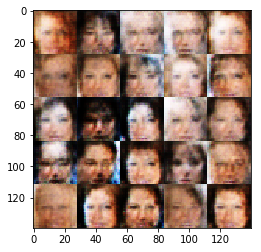

Epoch 1/1... Discriminator Loss: 0.8649... Generator Loss: 1.1354
Epoch 1/1... Discriminator Loss: 0.9070... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.4734
Epoch 1/1... Discriminator Loss: 1.0857... Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 0.8632... Generator Loss: 1.0809
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 0.8604... Generator Loss: 1.2474
Epoch 1/1... Discriminator Loss: 1.0706... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 1.1947... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.0285... Generator Loss: 1.2806


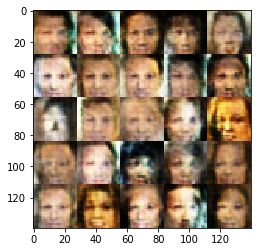

Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.2171... Generator Loss: 0.5869
Epoch 1/1... Discriminator Loss: 0.8162... Generator Loss: 1.7242
Epoch 1/1... Discriminator Loss: 0.8511... Generator Loss: 1.3261
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.1343... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 0.7766
Epoch 1/1... Discriminator Loss: 1.0255... Generator Loss: 2.1118
Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.1315
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.4989


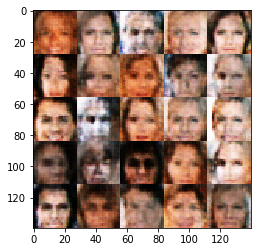

Epoch 1/1... Discriminator Loss: 1.0430... Generator Loss: 1.0668
Epoch 1/1... Discriminator Loss: 1.0447... Generator Loss: 1.0132
Epoch 1/1... Discriminator Loss: 0.9530... Generator Loss: 0.8623
Epoch 1/1... Discriminator Loss: 1.6749... Generator Loss: 0.3193
Epoch 1/1... Discriminator Loss: 0.8212... Generator Loss: 0.9668
Epoch 1/1... Discriminator Loss: 0.9134... Generator Loss: 0.8308
Epoch 1/1... Discriminator Loss: 1.1607... Generator Loss: 1.7551
Epoch 1/1... Discriminator Loss: 0.9445... Generator Loss: 1.2360
Epoch 1/1... Discriminator Loss: 0.8748... Generator Loss: 0.9437
Epoch 1/1... Discriminator Loss: 0.8457... Generator Loss: 0.9129


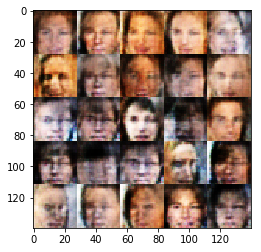

Epoch 1/1... Discriminator Loss: 1.1116... Generator Loss: 1.7296
Epoch 1/1... Discriminator Loss: 0.8354... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.1707... Generator Loss: 1.5459
Epoch 1/1... Discriminator Loss: 1.0232... Generator Loss: 1.0848
Epoch 1/1... Discriminator Loss: 0.7746... Generator Loss: 1.3436
Epoch 1/1... Discriminator Loss: 0.7973... Generator Loss: 1.2845
Epoch 1/1... Discriminator Loss: 1.5522... Generator Loss: 0.3436
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.5619
Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 1.0922... Generator Loss: 0.7550


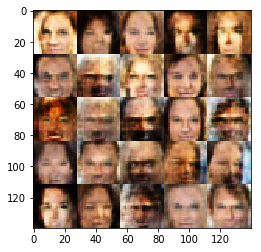

Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 0.8726
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 0.3886
Epoch 1/1... Discriminator Loss: 0.6913... Generator Loss: 1.8023
Epoch 1/1... Discriminator Loss: 0.9147... Generator Loss: 0.9459
Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.5370
Epoch 1/1... Discriminator Loss: 1.0490... Generator Loss: 2.1382
Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 0.7362
Epoch 1/1... Discriminator Loss: 1.1183... Generator Loss: 1.0639
Epoch 1/1... Discriminator Loss: 0.9190... Generator Loss: 0.9085
Epoch 1/1... Discriminator Loss: 0.7493... Generator Loss: 1.9887


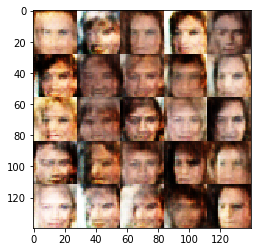

Epoch 1/1... Discriminator Loss: 1.0957... Generator Loss: 0.6614
Epoch 1/1... Discriminator Loss: 0.9128... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 0.9059... Generator Loss: 1.0720
Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 2.3653
Epoch 1/1... Discriminator Loss: 0.8905... Generator Loss: 1.6099
Epoch 1/1... Discriminator Loss: 0.9559... Generator Loss: 1.4907
Epoch 1/1... Discriminator Loss: 1.1009... Generator Loss: 0.5482
Epoch 1/1... Discriminator Loss: 0.7108... Generator Loss: 1.2693
Epoch 1/1... Discriminator Loss: 0.9786... Generator Loss: 1.2973
Epoch 1/1... Discriminator Loss: 1.0285... Generator Loss: 0.7567


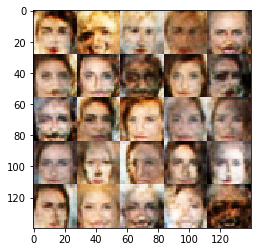

Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 2.1294
Epoch 1/1... Discriminator Loss: 0.9118... Generator Loss: 0.8680
Epoch 1/1... Discriminator Loss: 0.8467... Generator Loss: 1.0432
Epoch 1/1... Discriminator Loss: 0.8997... Generator Loss: 0.9066
Epoch 1/1... Discriminator Loss: 0.9949... Generator Loss: 1.2940
Epoch 1/1... Discriminator Loss: 1.1388... Generator Loss: 0.8431
Epoch 1/1... Discriminator Loss: 1.2071... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 0.8671... Generator Loss: 1.3664
Epoch 1/1... Discriminator Loss: 0.8190... Generator Loss: 1.6078
Epoch 1/1... Discriminator Loss: 1.0790... Generator Loss: 0.7594


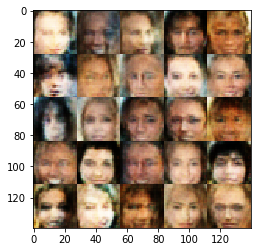

Epoch 1/1... Discriminator Loss: 1.0112... Generator Loss: 2.7839
Epoch 1/1... Discriminator Loss: 0.9235... Generator Loss: 1.2709
Epoch 1/1... Discriminator Loss: 1.6468... Generator Loss: 0.3184
Epoch 1/1... Discriminator Loss: 0.9226... Generator Loss: 1.2332
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 0.6094
Epoch 1/1... Discriminator Loss: 0.8205... Generator Loss: 1.8756
Epoch 1/1... Discriminator Loss: 0.9656... Generator Loss: 1.0223
Epoch 1/1... Discriminator Loss: 0.8365... Generator Loss: 1.1336
Epoch 1/1... Discriminator Loss: 1.6418... Generator Loss: 0.3180
Epoch 1/1... Discriminator Loss: 0.9590... Generator Loss: 0.9133


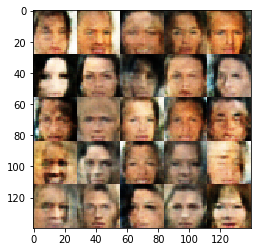

Epoch 1/1... Discriminator Loss: 0.9739... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.3392... Generator Loss: 0.5212
Epoch 1/1... Discriminator Loss: 0.8133... Generator Loss: 1.3130
Epoch 1/1... Discriminator Loss: 1.1396... Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 0.8660... Generator Loss: 1.5893
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 1.5209
Epoch 1/1... Discriminator Loss: 1.0930... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.1003... Generator Loss: 2.3365
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 1.4541
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.5543


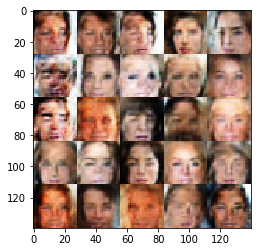

Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 1.1111
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 2.5625
Epoch 1/1... Discriminator Loss: 1.1305... Generator Loss: 0.6989
Epoch 1/1... Discriminator Loss: 0.9762... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 0.8644... Generator Loss: 1.3699
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 1.6918
Epoch 1/1... Discriminator Loss: 0.9671... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.0762... Generator Loss: 0.6555
Epoch 1/1... Discriminator Loss: 0.8553... Generator Loss: 1.3285
Epoch 1/1... Discriminator Loss: 1.0587... Generator Loss: 0.8413


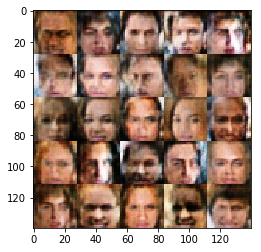

Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 1.2183
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 0.8306
Epoch 1/1... Discriminator Loss: 1.0133... Generator Loss: 1.5258
Epoch 1/1... Discriminator Loss: 0.6027... Generator Loss: 1.9011
Epoch 1/1... Discriminator Loss: 0.8729... Generator Loss: 1.1703
Epoch 1/1... Discriminator Loss: 1.0963... Generator Loss: 0.6577
Epoch 1/1... Discriminator Loss: 0.8668... Generator Loss: 1.1746
Epoch 1/1... Discriminator Loss: 0.8934... Generator Loss: 0.9920
Epoch 1/1... Discriminator Loss: 0.9330... Generator Loss: 0.9867
Epoch 1/1... Discriminator Loss: 0.9522... Generator Loss: 1.6963


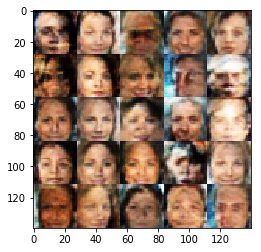

Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 2.6151
Epoch 1/1... Discriminator Loss: 1.1839... Generator Loss: 0.9320
Epoch 1/1... Discriminator Loss: 1.0803... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 0.8588... Generator Loss: 0.9983
Epoch 1/1... Discriminator Loss: 1.0377... Generator Loss: 0.9686
Epoch 1/1... Discriminator Loss: 0.9211... Generator Loss: 0.7886
Epoch 1/1... Discriminator Loss: 1.0814... Generator Loss: 0.7084
Epoch 1/1... Discriminator Loss: 1.0528... Generator Loss: 1.4420
Epoch 1/1... Discriminator Loss: 1.1400... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 0.9966... Generator Loss: 0.7855


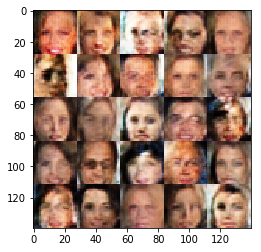

Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.7806
Epoch 1/1... Discriminator Loss: 0.7785... Generator Loss: 1.1120
Epoch 1/1... Discriminator Loss: 0.8043... Generator Loss: 1.1602
Epoch 1/1... Discriminator Loss: 1.0155... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 0.9026... Generator Loss: 0.9197
Epoch 1/1... Discriminator Loss: 0.8338... Generator Loss: 0.7803
Epoch 1/1... Discriminator Loss: 0.8579... Generator Loss: 1.0449
Epoch 1/1... Discriminator Loss: 1.0402... Generator Loss: 1.3927
Epoch 1/1... Discriminator Loss: 1.0070... Generator Loss: 0.8110
Epoch 1/1... Discriminator Loss: 1.0609... Generator Loss: 0.7077


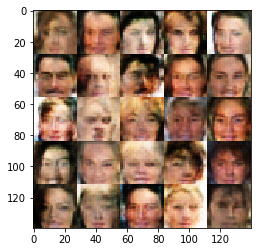

Epoch 1/1... Discriminator Loss: 0.9419... Generator Loss: 0.9068
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 0.6076
Epoch 1/1... Discriminator Loss: 1.0217... Generator Loss: 0.8795
Epoch 1/1... Discriminator Loss: 0.8979... Generator Loss: 1.2767
Epoch 1/1... Discriminator Loss: 0.9482... Generator Loss: 1.4667
Epoch 1/1... Discriminator Loss: 1.0165... Generator Loss: 0.8067
Epoch 1/1... Discriminator Loss: 1.1367... Generator Loss: 0.6794
Epoch 1/1... Discriminator Loss: 1.1295... Generator Loss: 0.5804
Epoch 1/1... Discriminator Loss: 0.8551... Generator Loss: 1.3592
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.5295


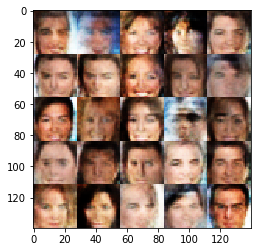

Epoch 1/1... Discriminator Loss: 0.7955... Generator Loss: 0.9289
Epoch 1/1... Discriminator Loss: 0.9101... Generator Loss: 0.9768
Epoch 1/1... Discriminator Loss: 1.4897... Generator Loss: 0.3862
Epoch 1/1... Discriminator Loss: 0.9951... Generator Loss: 0.8684
Epoch 1/1... Discriminator Loss: 1.1973... Generator Loss: 2.3081
Epoch 1/1... Discriminator Loss: 0.9592... Generator Loss: 1.0223
Epoch 1/1... Discriminator Loss: 0.8167... Generator Loss: 1.3610
Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.4540
Epoch 1/1... Discriminator Loss: 0.8650... Generator Loss: 1.1916


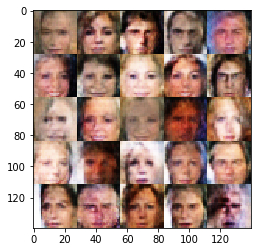

Epoch 1/1... Discriminator Loss: 0.8988... Generator Loss: 1.1154
Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 0.8034
Epoch 1/1... Discriminator Loss: 1.2086... Generator Loss: 0.5187
Epoch 1/1... Discriminator Loss: 0.9181... Generator Loss: 0.9889
Epoch 1/1... Discriminator Loss: 0.9134... Generator Loss: 1.4840
Epoch 1/1... Discriminator Loss: 0.9334... Generator Loss: 1.0761
Epoch 1/1... Discriminator Loss: 1.0127... Generator Loss: 0.7104
Epoch 1/1... Discriminator Loss: 0.9180... Generator Loss: 1.0441
Epoch 1/1... Discriminator Loss: 1.1332... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 0.9499... Generator Loss: 1.1490


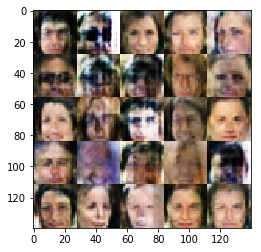

Epoch 1/1... Discriminator Loss: 0.9111... Generator Loss: 0.8562
Epoch 1/1... Discriminator Loss: 0.8912... Generator Loss: 1.3062
Epoch 1/1... Discriminator Loss: 1.2074... Generator Loss: 0.5547
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 1.9090
Epoch 1/1... Discriminator Loss: 0.9619... Generator Loss: 1.0073
Epoch 1/1... Discriminator Loss: 0.9842... Generator Loss: 1.2125
Epoch 1/1... Discriminator Loss: 0.8231... Generator Loss: 1.2744
Epoch 1/1... Discriminator Loss: 1.3446... Generator Loss: 0.4605
Epoch 1/1... Discriminator Loss: 0.9399... Generator Loss: 0.8652


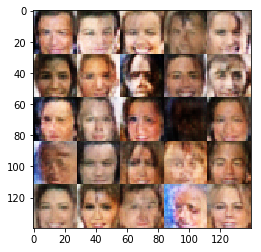

Epoch 1/1... Discriminator Loss: 0.7666... Generator Loss: 1.5447
Epoch 1/1... Discriminator Loss: 0.9115... Generator Loss: 1.8455
Epoch 1/1... Discriminator Loss: 0.9162... Generator Loss: 2.0623
Epoch 1/1... Discriminator Loss: 0.6968... Generator Loss: 1.4141
Epoch 1/1... Discriminator Loss: 0.7620... Generator Loss: 1.1762
Epoch 1/1... Discriminator Loss: 0.6230... Generator Loss: 1.7246
Epoch 1/1... Discriminator Loss: 1.0525... Generator Loss: 0.7159
Epoch 1/1... Discriminator Loss: 0.8534... Generator Loss: 1.3049
Epoch 1/1... Discriminator Loss: 1.2696... Generator Loss: 0.5021
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 0.6322


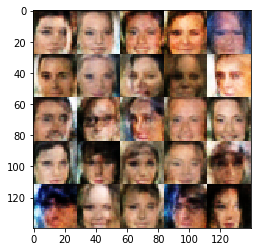

Epoch 1/1... Discriminator Loss: 0.9426... Generator Loss: 1.3686
Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 1.5127
Epoch 1/1... Discriminator Loss: 0.8520... Generator Loss: 1.9235
Epoch 1/1... Discriminator Loss: 1.0347... Generator Loss: 0.9662
Epoch 1/1... Discriminator Loss: 0.7243... Generator Loss: 1.3822
Epoch 1/1... Discriminator Loss: 0.8867... Generator Loss: 0.8627
Epoch 1/1... Discriminator Loss: 0.9687... Generator Loss: 0.9575
Epoch 1/1... Discriminator Loss: 1.0645... Generator Loss: 0.9467
Epoch 1/1... Discriminator Loss: 0.8076... Generator Loss: 1.7631
Epoch 1/1... Discriminator Loss: 0.8233... Generator Loss: 1.0500


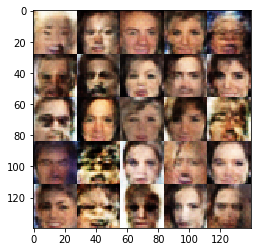

Epoch 1/1... Discriminator Loss: 0.8054... Generator Loss: 1.1157
Epoch 1/1... Discriminator Loss: 0.9257... Generator Loss: 1.7808
Epoch 1/1... Discriminator Loss: 1.1011... Generator Loss: 1.9980
Epoch 1/1... Discriminator Loss: 0.9514... Generator Loss: 1.2047
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.4956
Epoch 1/1... Discriminator Loss: 1.1981... Generator Loss: 1.2358


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.